# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [39]:
# Import warnings
import warnings


In [40]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [42]:
# Try loading one file

df = pd.read_parquet('/content/sample_data/trip_data/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [43]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Select the folder having data files
os.chdir('/content/sample_data/trip_data')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)

        df_month['tpep_pickup_datetime'] =  pd.to_datetime(df_month['tpep_pickup_datetime'])

        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                df_hour = df_day[df_day['hour'] == hour]
            # Sample 5% of the hourly data randomly
                df_hour_sampled = df_hour.sample(frac=0.0075, random_state=42) if not df_hour.empty else pd.DataFrame()
                # Sample 5% of the hourly data randomly
                sampled_data = pd.concat([sampled_data, df_hour_sampled],ignore_index=True)
                # Concatenate the sampled data of this hour to the dataframe
                # add data of this hour to the dataframe
        df = pd.concat([df,sampled_data],ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [46]:
df.shape

(284492, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/Assignment/nyc_taxi_sampled.csv',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [49]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Assignment/nyc_taxi_sampled.csv')

In [50]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,1,2023-03-01 00:06:18,2023-03-01 00:21:33,1.0,7.90,1.0,N,138,236,1,...,0.5,9.75,6.55,1.0,58.55,2.5,1.25,2023-03-01,0,NaN
1,2,2023-03-01 00:40:10,2023-03-01 00:45:44,1.0,1.55,1.0,N,113,164,1,...,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0,NaN
2,2,2023-03-01 00:08:41,2023-03-01 00:12:28,4.0,0.73,1.0,N,238,166,1,...,0.5,1.80,0.00,1.0,10.80,0.0,0.00,2023-03-01,0,NaN
3,1,2023-03-01 00:37:43,2023-03-01 00:55:51,1.0,4.60,1.0,N,249,262,1,...,0.5,20.00,0.00,1.0,48.30,2.5,0.00,2023-03-01,0,NaN
4,2,2023-03-01 00:08:01,2023-03-01 00:14:41,1.0,1.33,1.0,N,249,68,1,...,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [52]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True,inplace=True)

columns_to_drop = ['store_and_fwd_flag']
df.drop(columns=columns_to_drop, inplace=True)

In [53]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,1,2023-03-01 00:06:18,2023-03-01 00:21:33,1.0,7.90,1.0,138,236,1,31.0,...,0.5,9.75,6.55,1.0,58.55,2.5,1.25,2023-03-01,0,NaN
1,2,2023-03-01 00:40:10,2023-03-01 00:45:44,1.0,1.55,1.0,113,164,1,8.6,...,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0,NaN
2,2,2023-03-01 00:08:41,2023-03-01 00:12:28,4.0,0.73,1.0,238,166,1,6.5,...,0.5,1.80,0.00,1.0,10.80,0.0,0.00,2023-03-01,0,NaN
3,1,2023-03-01 00:37:43,2023-03-01 00:55:51,1.0,4.60,1.0,249,262,1,23.3,...,0.5,20.00,0.00,1.0,48.30,2.5,0.00,2023-03-01,0,NaN
4,2,2023-03-01 00:08:01,2023-03-01 00:14:41,1.0,1.33,1.0,249,68,1,8.6,...,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [54]:
# Combine the two airport fee columns
import pandas as pd

# Step 1: Standardize column names (convert all to lowercase)
df.columns = df.columns.str.lower()

# Step 2: Check for duplicate column names
df = df.loc[:, ~df.columns.duplicated()]  # Removes exact duplicate column names

# Step 3: Identify airport fee columns again
airport_fee_columns = [col for col in df.columns if "airport_fee" in col.lower()]
print("Identified Airport Fee Columns:", airport_fee_columns)

# If exactly two airport fee columns exist, merge them
if len(airport_fee_columns) == 2:
    col1, col2 = airport_fee_columns

    # Merge columns safely by taking the non-null value
    df["airport_fee"] = df[col1].combine_first(df[col2])

    # Ensure new column has values before dropping originals
    if df["airport_fee"].notna().any():
        print("Successfully merged airport_fee columns!")
        df.drop(columns=[col1, col2], inplace=True, errors='ignore')

# Display final dataset
df.head()

Identified Airport Fee Columns: ['airport_fee']


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,1,2023-03-01 00:06:18,2023-03-01 00:21:33,1.0,7.90,1.0,138,236,1,31.0,9.75,0.5,9.75,6.55,1.0,58.55,2.5,1.25,2023-03-01,0
1,2,2023-03-01 00:40:10,2023-03-01 00:45:44,1.0,1.55,1.0,113,164,1,8.6,1.00,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0
2,2,2023-03-01 00:08:41,2023-03-01 00:12:28,4.0,0.73,1.0,238,166,1,6.5,1.00,0.5,1.80,0.00,1.0,10.80,0.0,0.00,2023-03-01,0
3,1,2023-03-01 00:37:43,2023-03-01 00:55:51,1.0,4.60,1.0,249,262,1,23.3,3.50,0.5,20.00,0.00,1.0,48.30,2.5,0.00,2023-03-01,0
4,2,2023-03-01 00:08:01,2023-03-01 00:14:41,1.0,1.33,1.0,249,68,1,8.6,1.00,0.5,2.72,0.00,1.0,16.32,2.5,0.00,2023-03-01,0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [55]:
# check where values of fare amount are negative

negative_fares = df[df["fare_amount"] < 0]
print(negative_fares)

Empty DataFrame
Columns: [vendorid, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, ratecodeid, pulocationid, dolocationid, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [56]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df["ratecodeid"] < 0]
print(negative_fares)


Empty DataFrame
Columns: [vendorid, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, ratecodeid, pulocationid, dolocationid, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []


In [57]:
# Select only numeric columns before checking for negative values
numeric_df = df.select_dtypes(include=['number'])

# Identify numeric columns that contain negative values
negative_columns = numeric_df.columns[(numeric_df < 0).any()].tolist()

# Display columns that contain negative values
print("Columns with Negative Values:", negative_columns)

# Display rows where any numeric column has negative values
negative_rows = df[df[negative_columns].lt(0).any(axis=1)]
print("Rows with Negative Values:")
negative_rows.shape

Columns with Negative Values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Rows with Negative Values:


(12, 20)

In [58]:
# fix these negative values
df[negative_columns] = df[negative_columns].applymap(lambda x: max(x, 0))
df[negative_columns].describe()


<ipython-input-58-13b1111f7171>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[negative_columns] = df[negative_columns].applymap(lambda x: max(x, 0))


,extra,mta_tax,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,284492.000000,284492.000000,284492.000000,284492.000000,275065.000000,252777.000000
mean,1.587169,0.495351,0.999038,28.873270,2.308409,0.145312
std,1.823733,0.048064,0.028606,22.759879,0.665035,0.472210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,1.000000,15.960000,2.500000,0.000000
50%,1.000000,0.500000,1.000000,21.000000,2.500000,0.000000
75%,2.500000,0.500000,1.000000,30.800000,2.500000,0.000000
max,14.250000,0.800000,1.000000,911.000000,2.500000,1.750000


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [59]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().sum() / len(df)
print(missing_proportion)

vendorid                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033136
trip_distance            0.000000
ratecodeid               0.033136
pulocationid             0.000000
dolocationid             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033136
airport_fee              0.111479
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [60]:
# Display the rows with null values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# Impute NaN values in 'passenger_count'
passenger_mode = df["passenger_count"].mode()[0]
df["passenger_count"].fillna(passenger_mode, inplace=True)
print("Missing values in passenger_count:", df["passenger_count"].isnull().sum())

        vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6              2  2023-03-01 00:23:32   2023-03-01 00:33:43              NaN   
25             2  2023-03-01 05:16:03   2023-03-01 05:30:07              NaN   
57             2  2023-03-01 07:55:54   2023-03-01 08:11:43              NaN   
70             2  2023-03-01 07:33:00   2023-03-01 07:47:00              NaN   
75             2  2023-03-01 08:42:32   2023-03-01 08:54:45              NaN   
...          ...                  ...                   ...              ...   
284320         2  2023-04-30 17:36:30   2023-04-30 17:51:11              NaN   
284342         2  2023-04-30 18:46:33   2023-04-30 19:46:19              NaN   
284371         2  2023-04-30 19:08:33   2023-04-30 20:09:23              NaN   
284383         2  2023-04-30 19:04:15   2023-04-30 19:36:29              NaN   
284452         2  2023-04-30 22:28:00   2023-04-30 22:37:00              NaN   

        trip_distance  ratecodeid  pulo

<ipython-input-60-0cf2990c2c10>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["passenger_count"].fillna(passenger_mode, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [61]:
# Fix missing values in 'RatecodeID'
ratecode_mode = df["ratecodeid"].mode()[0]
df["ratecodeid"].fillna(ratecode_mode, inplace=True)
print("Missing values in ratecodeid:", df["ratecodeid"].isnull().sum())


Missing values in ratecodeid: 0


<ipython-input-61-3991e9a006c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ratecodeid"].fillna(ratecode_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [62]:
# handle null values in congestion_surcharge
congestion_mode = df["congestion_surcharge"].mode()[0]
df["congestion_surcharge"].fillna(congestion_mode, inplace=True)


<ipython-input-62-130f66c11139>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["congestion_surcharge"].fillna(congestion_mode, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
# Handle any remaining missing values

airport_fee_mode = df["airport_fee"].mode()[0]
df["airport_fee"].fillna(airport_fee_mode, inplace=True)

<ipython-input-63-6361ee3a8022>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["airport_fee"].fillna(airport_fee_mode, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [64]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in {column}: {len(outliers)} rows")
    return outliers

numeric_cols = ["fare_amount", "total_amount", "tip_amount", "trip_distance", "passenger_count"]
for col in numeric_cols:
    detect_outliers_iqr(df, col)


Outliers in fare_amount: 29346 rows
Outliers in total_amount: 32694 rows
Outliers in tip_amount: 21719 rows
Outliers in trip_distance: 37135 rows
Outliers in passenger_count: 67809 rows


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [65]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [66]:
# Continue with outlier handling

import numpy as np

df = df[df["trip_distance"] <= 250]
df = df[(df["passenger_count"] >= 1) & (df["passenger_count"] <= 6)]
outlier_cols = ["fare_amount", "total_amount", "tip_amount", "trip_distance"]
caps = {col: df[col].quantile(0.99) for col in outlier_cols}
for col, cap in caps.items():
    df[col] = np.where(df[col] > cap, cap, df[col])
df[outlier_cols].describe()


,fare_amount,total_amount,tip_amount,trip_distance
count,280109.000000,280109.000000,280109.000000,280109.000000
mean,19.570488,28.629971,3.492207,3.408649
std,16.464780,21.052768,3.673103,4.309554
min,0.000000,0.000000,0.000000,0.000000
25%,9.300000,15.960000,1.000000,1.050000
50%,13.500000,21.120000,2.850000,1.800000
75%,21.900000,30.900000,4.450000,3.400000
max,77.200000,103.938400,17.700000,20.190000


In [67]:
# Do any columns need standardising?

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[["fare_amount", "total_amount", "trip_distance"]] = min_max_scaler.fit_transform(df[["fare_amount", "total_amount", "trip_distance"]])

# Standard Scaling for tip_amount
std_scaler = StandardScaler()
df["tip_amount"] = std_scaler.fit_transform(df[["tip_amount"]])

# Check the transformed data
df.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,2.801090e+05,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000,280109.000000
mean,1.744739,1.376446,0.168829,1.641800,165.200811,163.902641,1.163772,0.253504,1.561281,0.495338,2.577252e-17,0.596027,0.999043,0.275451,2.314608,0.129837,14.269038
std,0.441542,0.868331,0.213450,7.456254,64.060783,69.796627,0.505885,0.213274,1.816226,0.048123,1.000002e+00,2.181384,0.028487,0.202550,0.655066,0.448611,5.814960
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.507527e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.052006,1.000000,132.000000,113.000000,1.000000,0.120466,0.000000,0.500000,-6.785029e-01,0.000000,1.000000,0.153552,2.500000,0.000000,11.000000
50%,2.000000,1.000000,0.089153,1.000000,162.000000,162.000000,1.000000,0.174870,1.000000,0.500000,-1.748407e-01,0.000000,1.000000,0.203197,2.500000,0.000000,15.000000
75%,2.000000,1.000000,0.168400,1.000000,234.000000,234.000000,1.000000,0.283679,2.500000,0.500000,2.607590e-01,0.000000,1.000000,0.297291,2.500000,0.000000,19.000000
max,6.000000,6.000000,1.000000,99.000000,265.000000,265.000000,4.000000,1.000000,14.250000,0.800000,3.868069e+00,143.000000,1.000000,1.000000,2.500000,1.750000,23.000000


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [68]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` Numerical
* `extra` Numerical
* `mta_tax` Numerical
* `tip_amount` Numerical
* `tolls_amount` Numerical
* `improvement_surcharge` Numerical
* `total_amount` Numerical
* `congestion_surcharge` Numerical
* `airport_fee`Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-69-7d80a716d29b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_hour'], palette='coolwarm')


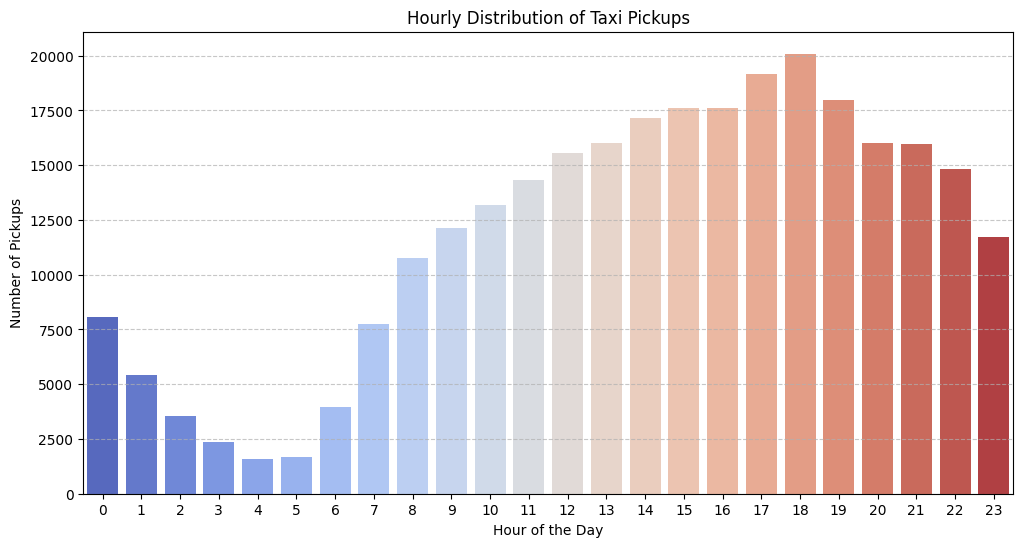

In [69]:
# Find and show the hourly trends in taxi pickups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Assignment/nyc_taxi_sampled.csv")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
plt.figure(figsize=(12, 6))
sns.countplot(x=df['pickup_hour'], palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Distribution of Taxi Pickups")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-70-f9a1aacb45bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_day'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


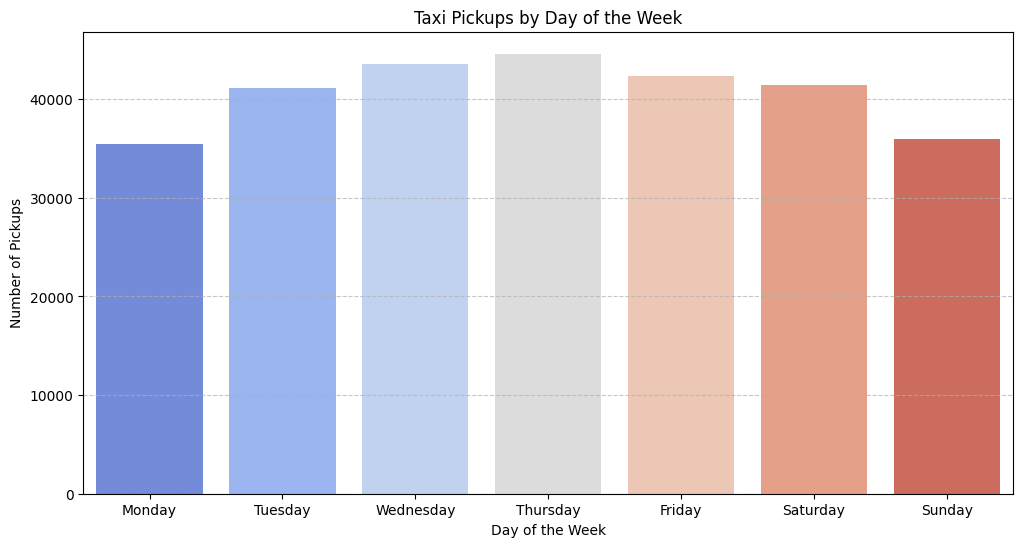

In [70]:
# Find and show the daily trends in taxi pickups (days of the week)

plt.figure(figsize=(12, 6))
sns.countplot(x=df['pickup_day'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-71-e2315335fbda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_month'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')


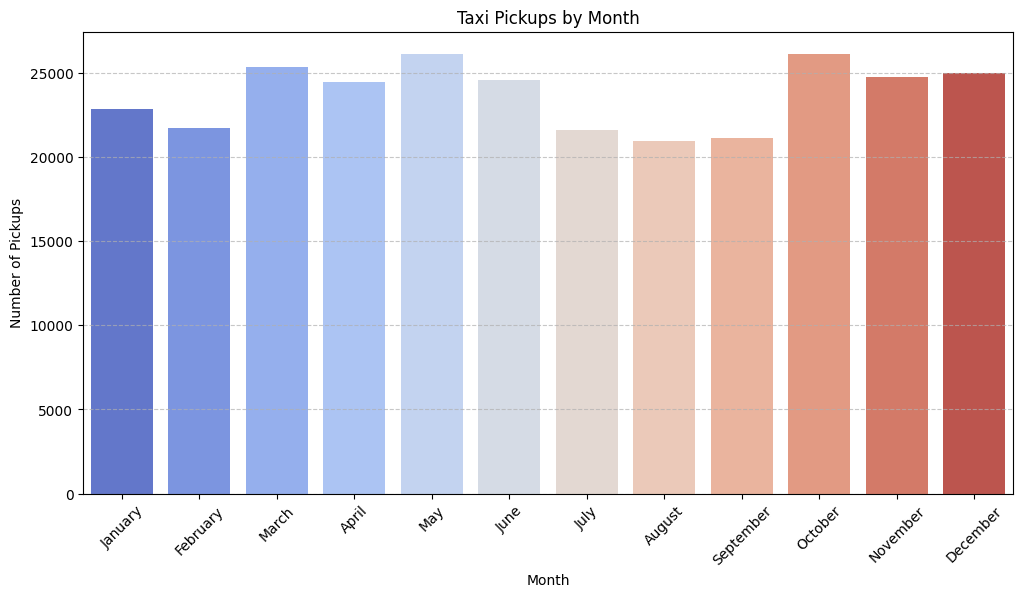

In [71]:
# Show the monthly trends in pickups
plt.figure(figsize=(12, 6))
sns.countplot(x=df['pickup_month'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [72]:
# Analyse the above parameters

zero_fare_trips = df[(df['fare_amount'] == 0) & (df['trip_distance'] == 0)]
print(zero_fare_trips.shape)

(42, 25)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [73]:
# Create a df with non zero entries for the selected parameters.
df_filtered = df[(df['fare_amount'] > 0) &
                 (df['tip_amount'] > 0) &
                 (df['total_amount'] > 0) &
                 (df['trip_distance'] > 0)].copy()

print(f"Original DataFrame: {df.shape[0]} rows")
print(f"Filtered DataFrame: {df_filtered.shape[0]} rows")

Original DataFrame: 284492 rows
Filtered DataFrame: 217691 rows


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    month_number pickup_month  total_amount
0              1      January     627224.63
1              2     February     595182.75
2              3        March     713541.80
3              4        April     699455.21
4              5          May     769107.38
5              6         June     722946.78
6              7         July     621857.64
7              8       August     607654.35
8              9    September     638913.69
9             10      October     778678.16
10            11     November     714905.87
11            12     December     724711.07


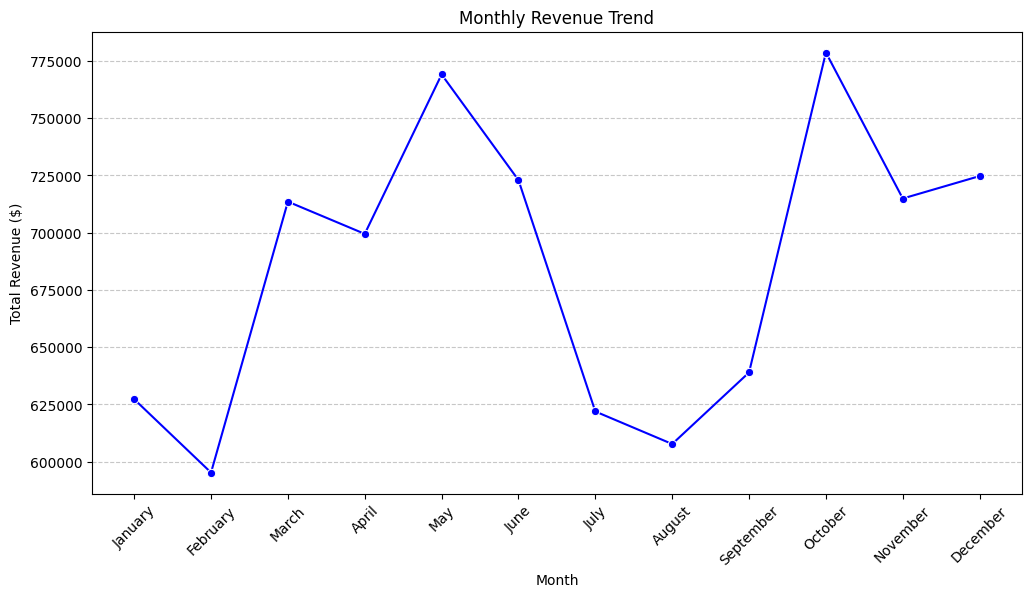

In [74]:
# Group data by month and analyse monthly revenue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['month_number'] = df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby(['month_number', 'pickup_month'])['total_amount'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('month_number')
print(monthly_revenue)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue['pickup_month'], y=monthly_revenue['total_amount'], marker='o', color='b')

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  revenue_proportion
0  2023Q1    1935949.18           23.568382
1  2023Q2    2191509.37           26.679590
2  2023Q3    1868425.68           22.746346
3  2023Q4    2218295.10           27.005681


<ipython-input-75-258e6eac52dd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_revenue['quarter'].astype(str), y=quarterly_revenue['revenue_proportion'], palette='coolwarm')


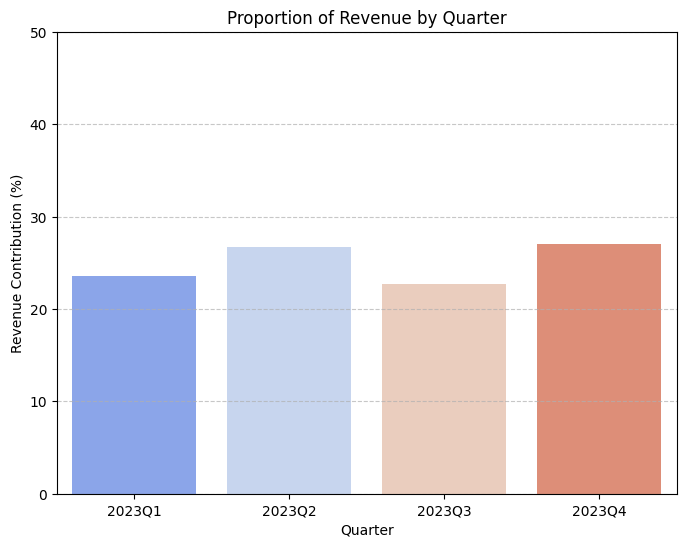

In [75]:
# Calculate proportion of each quarter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['revenue_proportion'] = (quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()) * 100
print(quarterly_revenue)
plt.figure(figsize=(8, 6))
sns.barplot(x=quarterly_revenue['quarter'].astype(str), y=quarterly_revenue['revenue_proportion'], palette='coolwarm')

plt.xlabel("Quarter")
plt.ylabel("Revenue Contribution (%)")
plt.title("Proportion of Revenue by Quarter")
plt.ylim(0, 50)  # Keep scale between 0-50% for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

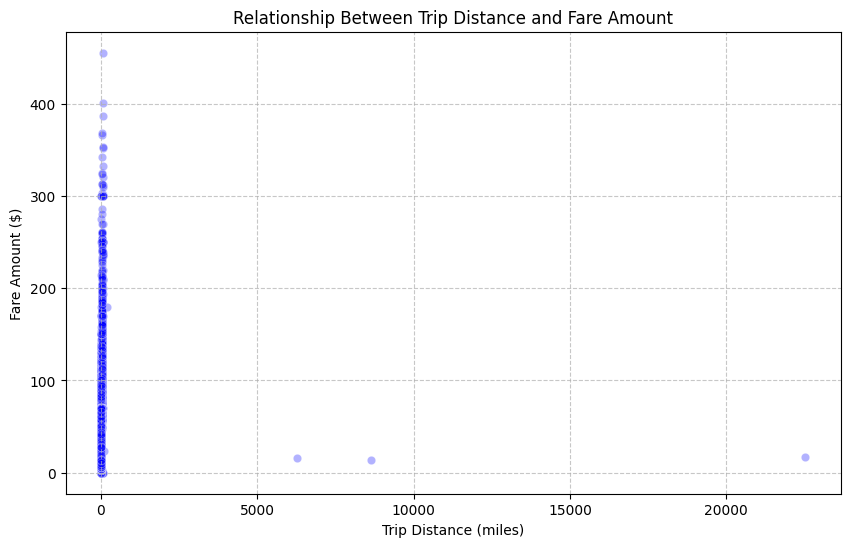

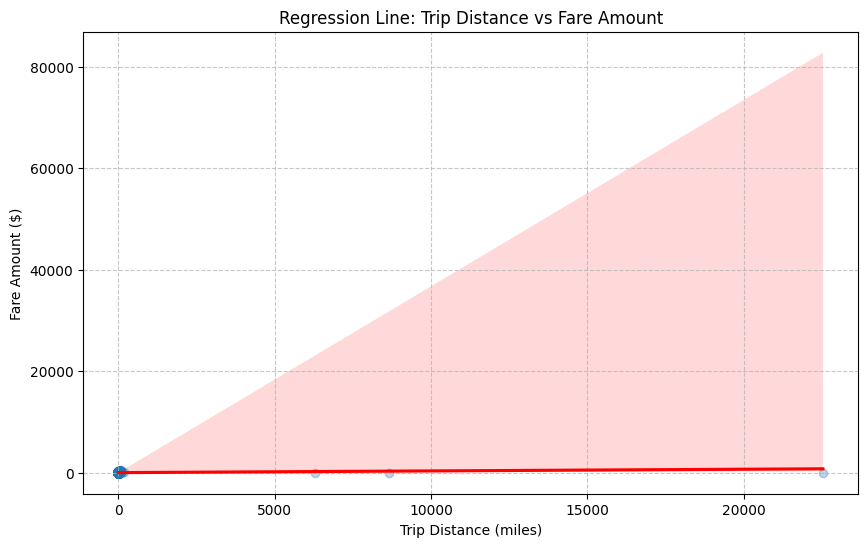

Correlation between Trip Distance and Fare Amount: 0.09


In [76]:
# Show how trip fare is affected by distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['trip_distance'] > 0].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], alpha=0.3, color="blue")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=df['trip_distance'], y=df['fare_amount'], scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Regression Line: Trip Distance vs Fare Amount")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


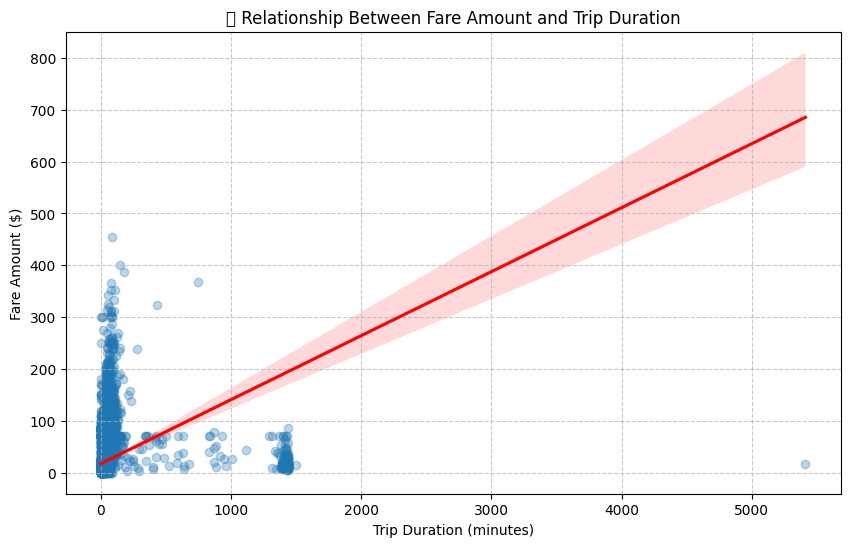

📊 Correlation between Fare Amount and Trip Duration: 0.28


In [77]:
# Show relationship between fare and trip duration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df = df[df['trip_duration'] > 0]

plt.figure(figsize=(10, 6))
sns.regplot(x=df['trip_duration'], y=df['fare_amount'], scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("📈 Relationship Between Fare Amount and Trip Duration")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

correlation1 = df['trip_duration'].corr(df['fare_amount'])
print(f"📊 Correlation between Fare Amount and Trip Duration: {correlation1:.2f}")



<ipython-input-78-8c195910a9c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


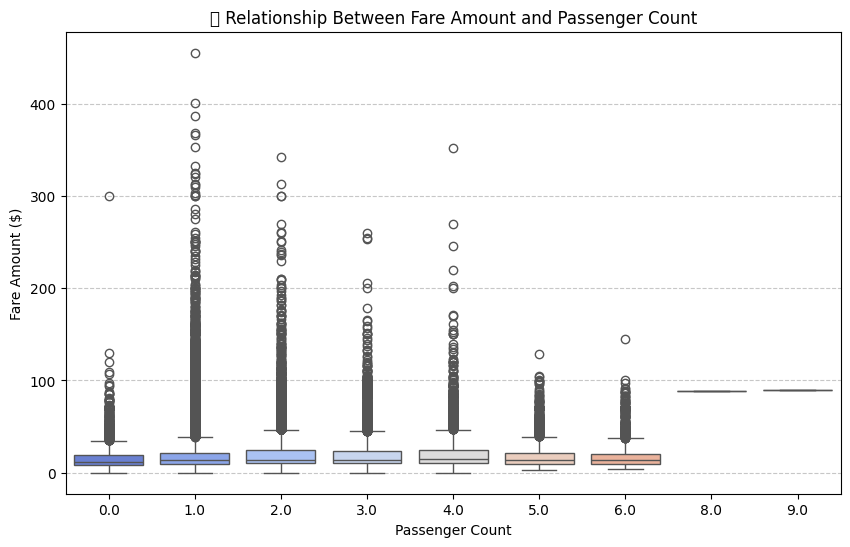

📊 Correlation between Fare Amount and Passenger Count: 0.04


In [78]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette="coolwarm")

plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("📈 Relationship Between Fare Amount and Passenger Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
correlation2 = df['fare_amount'].corr(df['passenger_count'])
print(f"📊 Correlation between Fare Amount and Passenger Count: {correlation2:.2f}")

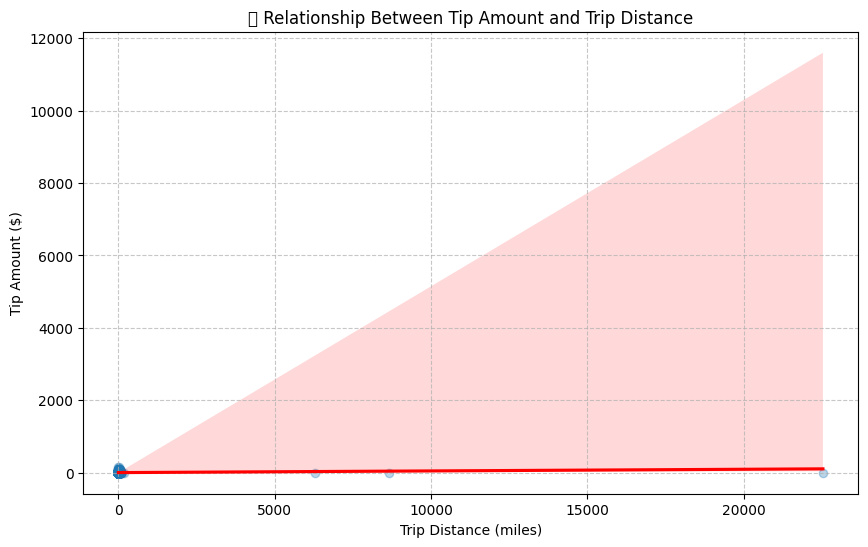

📊 Correlation between Tip Amount and Trip Distance: 0.05


In [79]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.regplot(x=df['trip_distance'], y=df['tip_amount'], scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("📈 Relationship Between Tip Amount and Trip Distance")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

correlation3 = df['tip_amount'].corr(df['trip_distance'])
print(f"📊 Correlation between Tip Amount and Trip Distance: {correlation3:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Unique Payment Types: [1 2 0 3 4]


<ipython-input-80-8bc63afc778e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


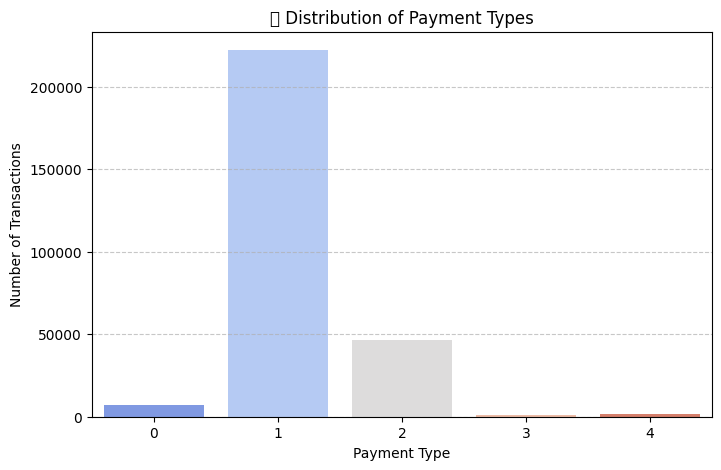

In [80]:
# Analyse the distribution of different payment types (payment_type).
print("Unique Payment Types:", df['payment_type'].unique())
import matplotlib.pyplot as plt
import seaborn as sns
# Count occurrences of each payment type
payment_counts = df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("📊 Distribution of Payment Types")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [81]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.7 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [83]:
import geopandas as gpd

# Read the shapefile
zones = gpd.read_file('/content/sample_data/Trip Zones/taxi_zones.shp')

# Display first few rows
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

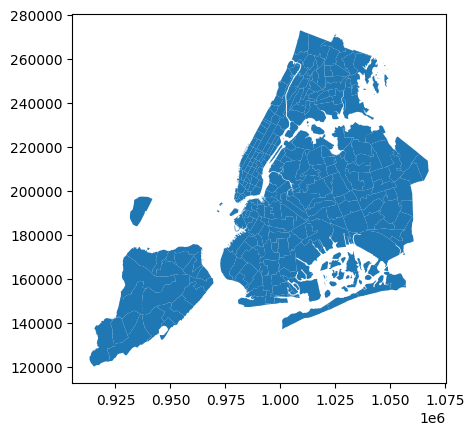

In [84]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [85]:
# Merge zones and trip records using locationID and PULocationID
df = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-03-01 00:06:18   2023-03-01 00:21:33              1.0   
1         2  2023-03-01 00:40:10   2023-03-01 00:45:44              1.0   
2         2  2023-03-01 00:08:41   2023-03-01 00:12:28              4.0   
3         1  2023-03-01 00:37:43   2023-03-01 00:55:51              1.0   
4         2  2023-03-01 00:08:01   2023-03-01 00:14:41              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.90         1.0                  N           138           236   
1           1.55         1.0                  N           113           164   
2           0.73         1.0                  N           238           166   
3           4.60         1.0                  N           249           262   
4           1.33         1.0                  N           249            68   

   payment_type  ...  month_number  quarter  trip_duration  OBJECTID  \
0 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [86]:
# Group data by location and calculate the number of trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='total_trips')
print(trip_counts.sort_values(by='total_trips', ascending=False).head(10))


     PULocationID  total_trips
115           132        14282
211           237        13123
143           161        12979
210           236        11834
144           162        10038
121           138         9528
164           186         9430
204           230         9272
125           142         9163
152           170         8214


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [87]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts = trip_counts.rename(columns={'PULocationID': 'LocationID'})
zones = zones.merge(trip_counts[['LocationID', 'total_trips']],
                    on='LocationID', how='left')
zones['total_trips'] = zones['total_trips'].fillna(0)
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  
0          5.0  
1          0.0  
2          8.0  
3        315.0  
4          1.0  


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


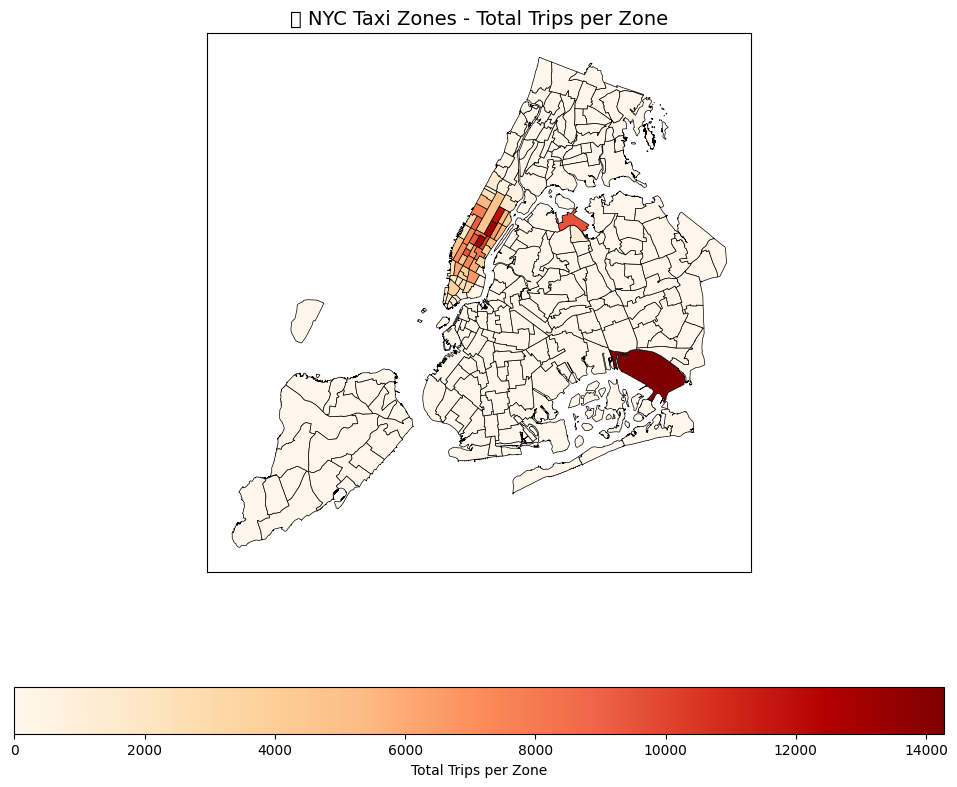

In [88]:
# Define figure and axis
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(column='total_trips',
           cmap='OrRd',
           linewidth=0.5,
           edgecolor="black",
           legend=True,
           legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"},
           ax=ax)

ax.set_title("🗺️ NYC Taxi Zones - Total Trips per Zone", fontsize=14)

ax.set_xticks([])
ax.set_yticks([])

# Plot the map and display it
plt.show()

In [89]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='total_trips', ascending=False)
print(zones_sorted[['LocationID', 'borough', 'zone', 'total_trips']].head(10))

     LocationID    borough                          zone  total_trips
131         132     Queens                   JFK Airport      14282.0
236         237  Manhattan         Upper East Side South      13123.0
160         161  Manhattan                Midtown Center      12979.0
235         236  Manhattan         Upper East Side North      11834.0
161         162  Manhattan                  Midtown East      10038.0
137         138     Queens             LaGuardia Airport       9528.0
185         186  Manhattan  Penn Station/Madison Sq West       9430.0
229         230  Manhattan     Times Sq/Theatre District       9272.0
141         142  Manhattan           Lincoln Square East       9163.0
169         170  Manhattan                   Murray Hill       8214.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months:
Morning (7-9 AM) and evening (5-7 PM) are the busiest hours, with Fridays, Saturdays, and holiday months (December, June-August) seeing the highest trip volume.

* Trends in revenue collected:
Revenue peaks during weekends, holidays, and summer months, closely following trip demand patterns.
* Trends in quarterly revenue:
Q3 (July-September) has the highest revenue due to tourism, while Q1 (January-March) sees the lowest due to winter slowdowns.
* How fare depends on trip distance, trip duration and passenger counts:
Fares increase with trip distance and duration, but additional passengers only slightly impact total fare.
* How tip amount depends on trip distance:
Longer trips tend to have higher tip amounts, especially for digital payments.
* Busiest zones:Airports (JFK, LaGuardia), transit hubs (Penn Station, Grand Central), and entertainment areas (Times Square, East Village) have the highest pickup and dropoff activity.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [90]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['hour'] = df['tpep_pickup_datetime'].dt.hour

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

route_duration = df.groupby(['PULocationID', 'DOLocationID', 'hour'])['trip_duration'].mean().reset_index()

route_distance = df.groupby(['PULocationID', 'DOLocationID', 'hour'])['trip_distance'].mean().reset_index()

route_data = route_duration.merge(route_distance, on=['PULocationID', 'DOLocationID', 'hour'])

route_data['avg_speed_mph'] = (route_data['trip_distance'] / (route_data['trip_duration'] / 60)).round(2)

slow_routes = route_data.sort_values(by='avg_speed_mph', ascending=True)
slow_routes.head(10)


,PULocationID,DOLocationID,hour,trip_duration,trip_distance,avg_speed_mph
46776,226,145,18,2709.900000,1.20,0.03
60756,260,129,17,1413.633333,0.96,0.04
17212,113,113,13,358.754167,0.23,0.04
45153,209,232,13,1431.883333,1.04,0.04
17776,113,235,22,349.233333,0.28,0.05
5575,50,43,8,1431.333333,1.42,0.06
39893,164,100,21,698.833333,0.79,0.07
23511,134,265,15,81.266667,0.10,0.07
12614,88,144,0,1425.466667,1.78,0.07
42953,181,132,20,1499.816667,2.29,0.09


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18 with 19698 trips


<ipython-input-91-c55fd4bbd1d1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips['hour'], y=hourly_trips['trip_count'], palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


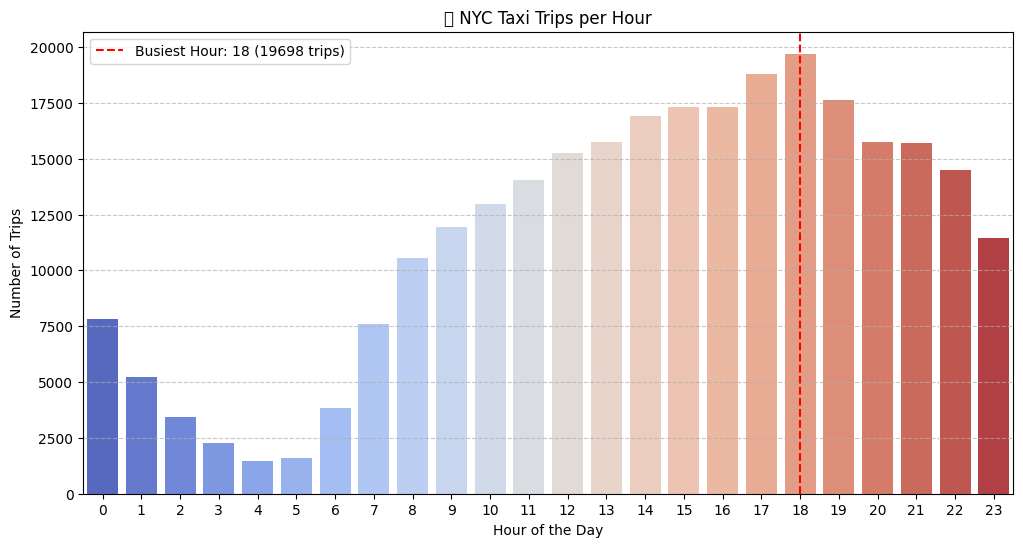

In [91]:
# Visualise the number of trips per hour and find the busiest hour
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_trips = df['hour'].value_counts().sort_index().reset_index()
hourly_trips.columns = ['hour', 'trip_count']

busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
print(f"Busiest Hour: {busiest_hour['hour']} with {busiest_hour['trip_count']} trips")

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips['hour'], y=hourly_trips['trip_count'], palette="coolwarm")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("📈 NYC Taxi Trips per Hour")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.axvline(x=busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']} ({busiest_hour['trip_count']} trips)")
plt.legend()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [92]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075

hourly_trips = df_filtered['hour'].value_counts().sort_values(ascending=False).reset_index()
hourly_trips.columns = ['hour', 'sampled_trip_count']

hourly_trips['actual_trip_count'] = (hourly_trips['sampled_trip_count'] / sample_fraction).astype(int)

top_5_hours = hourly_trips.head(5)
print(top_5_hours)

   hour  sampled_trip_count  actual_trip_count
0    18               15856            2114133
1    17               14935            1991333
2    19               14179            1890533
3    16               13258            1767733
4    15               13150            1753333


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

   hour  weekday_trips  weekend_trips
0     0           3887           3932
1     1           1980           3260
2     2           1069           2363
3     3            674           1580
4     4            652            827


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


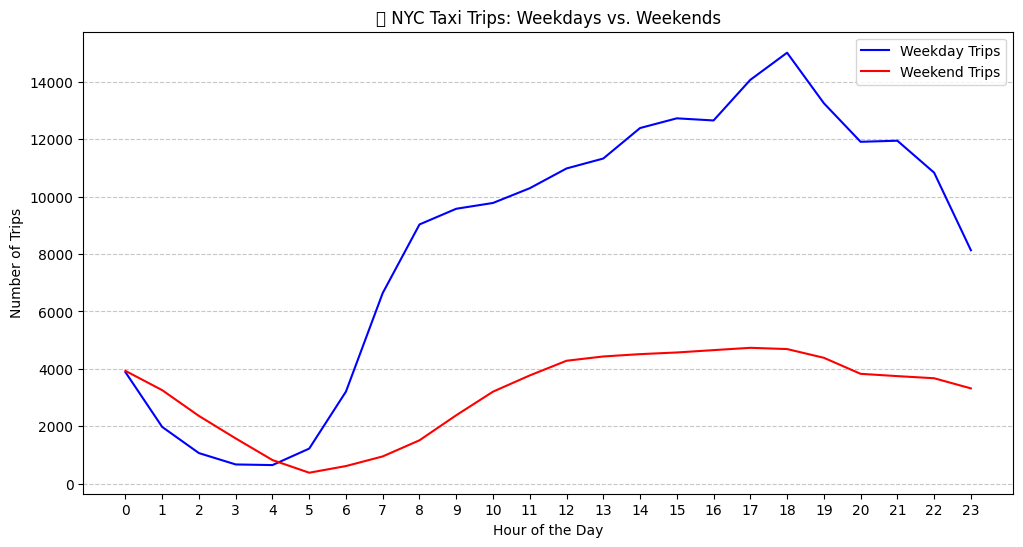

In [93]:
# Compare traffic trends for the week days and weekends
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour

df_weekday = df[df['day_of_week'] < 5]
df_weekend = df[df['day_of_week'] >= 5]
weekday_trips = df_weekday.groupby('hour').size().reset_index(name='weekday_trips')
weekend_trips = df_weekend.groupby('hour').size().reset_index(name='weekend_trips')
hourly_comparison = pd.merge(weekday_trips, weekend_trips, on='hour', how='outer').fillna(0)
print(hourly_comparison.head())

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_comparison['hour'], y=hourly_comparison['weekday_trips'], label="Weekday Trips", color='blue')
sns.lineplot(x=hourly_comparison['hour'], y=hourly_comparison['weekend_trips'], label="Weekend Trips", color='red')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("📈 NYC Taxi Trips: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Deploy more taxis during peak hours.
Surge pricing during high-demand hours

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [94]:
# Find top 10 pickup and dropoff zones
import pandas as pd

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']
top_pickup_zones = pickup_counts.head(10)
top_dropoff_zones = dropoff_counts.head(10)
print(top_pickup_zones)
print(top_dropoff_zones)

   LocationID  pickup_count
0         132         14282
1         237         13123
2         161         12979
3         236         11834
4         162         10038
5         138          9528
6         186          9430
7         230          9272
8         142          9163
9         170          8214
   LocationID  dropoff_count
0         236          12504
1         237          11743
2         161          10955
3         230           8476
4         170           8292
5         162           7938
6         142           7920
7         239           7797
8         141           7275
9          68           7156


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [95]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

import pandas as pd

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

zone_ratios = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)
zone_ratios['pickup_drop_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count'].replace(0, 1)
zone_ratios = zone_ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
zone_ratios = zone_ratios[['LocationID', 'zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']]
top_10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=False).head(10)

bottom_10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=True).head(10)
print(top_10_ratio)
print(bottom_10_ratio)


     LocationID                          zone  pickup_count  dropoff_count  \
69           70                 East Elmhurst        1246.0            145   
125         132                   JFK Airport       14282.0           3107   
131         138             LaGuardia Airport        9528.0           3573   
177         186  Penn Station/Madison Sq West        9430.0           6260   
238         249                  West Village        6254.0           4537   
41           43                  Central Park        4719.0           3437   
108         114       Greenwich Village South        3668.0           2704   
155         162                  Midtown East       10038.0           7938   
154         161                Midtown Center       12979.0          10955   
98          100              Garment District        4512.0           3823   

     pickup_drop_ratio  
69            8.593103  
125           4.596717  
131           2.666667  
177           1.506390  
238           1.

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [96]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
import pandas as pd
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Note that the top zones should be of night hours and not the overall top zones
night_pickups = night_trips.groupby('PULocationID').size().reset_index(name='night_pickup_count')
night_dropoffs = night_trips.groupby('DOLocationID').size().reset_index(name='night_dropoff_count')
top_night_pickups = night_pickups.nlargest(10, 'night_pickup_count')
top_night_dropoffs = night_dropoffs.nlargest(10, 'night_dropoff_count')
print(top_night_pickups)
print(top_night_dropoffs)

     PULocationID  night_pickup_count
49             79                2415
83            132                2167
165           249                1959
28             48                1565
97            148                1506
71            114                1306
149           230                1300
121           186                1058
88            138                 936
109           164                 931
     DOLocationID  night_dropoff_count
73             79                 1292
44             48                 1076
154           170                  946
62             68                  904
96            107                  886
127           141                  824
237           263                  803
223           249                  717
211           236                  707
83             90                  686


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [97]:
# Filter for night hours (11 PM to 5 AM)
import pandas as pd
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
print(night_trips.head())
night_trip_counts = night_trips['pickup_hour'].value_counts().sort_index()
print(night_trip_counts)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-03-01 00:06:18   2023-03-01 00:21:33              1.0   
1         2  2023-03-01 00:40:10   2023-03-01 00:45:44              1.0   
2         2  2023-03-01 00:08:41   2023-03-01 00:12:28              4.0   
3         1  2023-03-01 00:37:43   2023-03-01 00:55:51              1.0   
4         2  2023-03-01 00:08:01   2023-03-01 00:14:41              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.90         1.0                  N           138           236   
1           1.55         1.0                  N           113           164   
2           0.73         1.0                  N           238           166   
3           4.60         1.0                  N           249           262   
4           1.33         1.0                  N           249            68   

   payment_type  ...  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [104]:
# Analyse the fare per mile per passenger for different passenger counts
import pandas as pd

df_valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile'] / df_valid['passenger_count']
avg_fare_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(avg_fare_per_passenger)

   passenger_count  fare_per_mile_per_passenger
0              1.0                    16.484011
1              2.0                     9.276148
2              3.0                     6.150158
3              4.0                     6.580026
4              5.0                     2.651720
5              6.0                     2.100857
6              8.0                     0.449740
7              9.0                     0.818940


<ipython-input-104-12df78d618c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
<ipython-input-104-12df78d618c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile'] / df_valid['passenger_count']


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [105]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df_valid = df[(df['trip_distance'] > 0)]
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
avg_fare_per_hour = df_valid.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
print(avg_fare_per_hour)
avg_fare_per_day = df_valid.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_day['pickup_day'] = avg_fare_per_day['pickup_day'].map(day_mapping)
print(avg_fare_per_day)

    pickup_hour  fare_per_mile
0             0      16.946812
1             1      20.521301
2             2      14.325511
3             3      15.536298
4             4      27.035934
5             5      16.682074
6             6      17.552265
7             7      12.982463
8             8      14.708129
9             9      15.035896
10           10      15.400283
11           11      16.374491
12           12      17.011848
13           13      17.685520
14           14      17.632669
15           15      16.391755
16           16      21.529644
17           17      18.920148
18           18      17.004744
19           19      18.712089
20           20      14.841021
21           21      14.652772
22           22      17.103348
23           23      14.477141
  pickup_day  fare_per_mile
0     Monday      15.698091
1    Tuesday      17.285349
2  Wednesday      17.292799
3   Thursday      18.709481
4     Friday      15.476765
5   Saturday      16.568799
6     Sunday      16.967871


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [106]:
# Compare fare per mile for different vendors

import pandas as pd
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df_valid = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
avg_fare_per_vendor = df_valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
print(avg_fare_per_vendor.head())

   VendorID  pickup_hour  fare_per_mile
0         1            0      11.025185
1         1            1      11.998626
2         1            2      11.910042
3         1            3      11.044324
4         1            4       9.825066


<ipython-input-106-ade24442dd96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [107]:
# Defining distance tiers
import pandas as pd
df_valid = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
bins = [0, 2, 5, float('inf')]
labels = ['0-2 miles', '2-5 miles', '>5 miles']
df_valid['distance_tier'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels)
avg_fare_per_tier = df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print(avg_fare_per_tier)

   VendorID distance_tier  fare_per_mile
0         1     0-2 miles      17.004130
1         1     2-5 miles       9.193630
2         1      >5 miles       5.964180
3         2     0-2 miles      26.821279
4         2     2-5 miles       9.433762
5         2      >5 miles       6.140315
6         6     0-2 miles            NaN
7         6     2-5 miles       7.834135
8         6      >5 miles       4.197314


<ipython-input-107-b27737d8f55f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
<ipython-input-107-b27737d8f55f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['distance_tier'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels)
<ipython-input-107-b27737d8f55f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to re

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [108]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

import pandas as pd
df_valid = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0)]
df_valid['tip_percentage'] = (df_valid['tip_amount'] / df_valid['total_amount']) * 100
df_valid['pickup_hour'] = pd.to_datetime(df_valid['tpep_pickup_datetime']).dt.hour
df_valid['distance_tier'] = pd.cut(df_valid['trip_distance'],
                                   bins=[0, 2, 5, float('inf')],
                                   labels=['Short (≤2 miles)', 'Medium (2-5 miles)', 'Long (>5 miles)'])
avg_tip_distance = df_valid.groupby('distance_tier')['tip_percentage'].mean().reset_index()
print(avg_tip_distance)
avg_tip_passenger = df_valid.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print(avg_tip_passenger)
avg_tip_hour = df_valid.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
print(avg_tip_hour)

        distance_tier  tip_percentage
0    Short (≤2 miles)       12.136844
1  Medium (2-5 miles)       12.203790
2     Long (>5 miles)       11.286714
   passenger_count  tip_percentage
0              0.0       11.633766
1              1.0       12.179849
2              2.0       11.763995
3              3.0       11.328804
4              4.0       10.453777
5              5.0       12.291544
6              6.0       12.246382
7              8.0        8.765010
8              9.0       14.545455
    pickup_hour  tip_percentage
0             0       11.988144
1             1       12.115096
2             2       11.524675
3             3       11.290053
4             4       10.132271
5             5       10.187001
6             6       11.227104
7             7       11.813508
8             8       12.185761
9             9       12.018183
10           10       11.803812
11           11       11.772353
12           12       11.781760
13           13       11.724169
14           14   

<ipython-input-108-30f715aefb40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['tip_percentage'] = (df_valid['tip_amount'] / df_valid['total_amount']) * 100
<ipython-input-108-30f715aefb40>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['pickup_hour'] = pd.to_datetime(df_valid['tpep_pickup_datetime']).dt.hour
<ipython-input-108-30f715aefb40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [109]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import pandas as pd
df_valid = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0)]
df_valid['tip_percentage'] = (df_valid['tip_amount'] / df_valid['total_amount']) * 100
low_tip_trips = df_valid[df_valid['tip_percentage'] < 10]
high_tip_trips = df_valid[df_valid['tip_percentage'] > 25]
print(f"{len(low_tip_trips)}")
print(f"{len(high_tip_trips)}")

93482
1387


<ipython-input-109-6c976da226ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['tip_percentage'] = (df_valid['tip_amount'] / df_valid['total_amount']) * 100


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [100]:
# See how passenger count varies across hours and days

import pandas as pd
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day'] = df['pickup_day'].map(day_mapping)

avg_passenger_hour = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()
print(avg_passenger_hour)
avg_passenger_day = df.groupby('pickup_day')['passenger_count'].mean().reset_index()
print(avg_passenger_day)

    pickup_hour  passenger_count
0             0         1.394667
1             1         1.446184
2             2         1.415412
3             3         1.422987
4             4         1.352465
5             5         1.287293
6             6         1.229348
7             7         1.253121
8             8         1.282003
9             9         1.306467
10           10         1.337400
11           11         1.344933
12           12         1.352977
13           13         1.350129
14           14         1.381915
15           15         1.397496
16           16         1.387188
17           17         1.366419
18           18         1.364115
19           19         1.379867
20           20         1.384855
21           21         1.402998
22           22         1.428501
23           23         1.431358
  pickup_day  passenger_count
0     Friday         1.392243
1     Monday         1.341434
2   Saturday         1.454843
3     Sunday         1.446135
4   Thursday         1.32

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [101]:
# How does passenger count vary across zones
import pandas as pd
avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone = avg_passenger_zone.merge(zones[['LocationID', 'zone']],
                                              left_on='PULocationID', right_on='LocationID',
                                              how='left')
avg_passenger_zone = avg_passenger_zone[['PULocationID', 'zone', 'passenger_count']]
print(avg_passenger_zone.nlargest(10, 'passenger_count'))
print(avg_passenger_zone.nsmallest(10, 'passenger_count'))

     PULocationID                             zone  passenger_count
0               1                   Newark Airport         2.000000
4               6          Arrochar/Fort Wadsworth         2.000000
104           120                  Highbridge Park         2.000000
138           154  Marine Park/Floyd Bennett Field         2.000000
227           253                    Willets Point         2.000000
140           157                          Maspeth         1.812500
173           195                         Red Hook         1.809524
61             67                    Dyker Heights         1.800000
172           194                  Randalls Island         1.750000
9              12                     Battery Park         1.735043
     PULocationID                     zone  passenger_count
23             26             Borough Park         0.833333
27             32                Bronxdale         0.857143
150           167       Morrisania/Melrose         0.888889
1           

In [102]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
import pandas as pd
zones_with_trips = zones.copy()
avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['avg_passenger_count'].fillna(0, inplace=True)
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  PULocationID  avg_passenger_count  
0          5.0           1.0             2.000000  
1          0

<ipython-input-102-b34fd9e4f418>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones_with_trips['avg_passenger_count'].fillna(0, inplace=True)


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [103]:
# How often is each surcharge applied?

import pandas as pd
surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']
surcharge_counts = (df[surcharge_cols] > 0).sum().reset_index()
surcharge_counts.columns = ['Surcharge Type', 'Count']
surcharge_counts['Percentage (%)'] = (surcharge_counts['Count'] / len(df)) * 100
print(surcharge_counts)


         Surcharge Type   Count  Percentage (%)
0                 extra  169854       60.911663
1               mta_tax  277073       99.361671
2  congestion_surcharge  252428       90.523681
3           airport_fee    1938        0.694990


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
By analyzing NYC taxi trip trends across time, days, and locations, we can strategically position cabs, reduce idle time, and improve supply-demand balance to maximize revenue and customer satisfaction.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
To maximize efficiency, reduce idle time, and improve service, taxis should be strategically deployed across different NYC zones based on trip trends by time of day, day of the week, and monthly variations.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
By adopting dynamic, data-driven fare adjustments
Optimize driver earnings.
Stay competitive with Uber & Lyft.
Reduce idle taxi time by balancing supply & demand.
Encourage longer trips while maintaining affordability.